In [2]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"D:\DigitalMarketting\Project\instacart_2017_05_01\orders.csv")

In [4]:
Order_totals = pd.read_csv(r"D:\DigitalMarketting\Project\instacart_2017_05_01\OrderTotals.csv")
Order_totals

,product_id,product_name,aisle_id,department_id,cost_x,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cost_y
0,1,Chocolate Sandwich Cookies,61,19,27,1107,7,0,38259,prior,2,1,11,7.0,43
1,769,Sliced American Cheese,21,16,16,1107,10,0,38259,prior,2,1,11,7.0,43
2,1,Chocolate Sandwich Cookies,61,19,27,5319,3,1,196224,prior,65,1,14,1.0,27
3,1,Chocolate Sandwich Cookies,61,19,27,7540,4,1,138499,prior,8,0,14,7.0,27
4,1,Chocolate Sandwich Cookies,61,19,27,9228,2,0,79603,prior,2,2,10,30.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504418,1000,Apricots,18,10,28,3412783,13,0,204776,prior,7,1,14,8.0,28
504419,1000,Apricots,18,10,28,3414859,3,0,77374,prior,12,3,12,5.0,28
504420,1000,Apricots,18,10,28,3415415,3,0,114548,prior,27,5,0,9.0,28
504421,1000,Apricots,18,10,28,3419937,55,0,87112,prior,2,0,14,30.0,28


In [5]:
user_count = Order_totals.groupby('user_id')[['user_id']].count()
user_count
#user_count = Order_totals.groupby(['user_id']).agg({'user_id': 'count'}).reset_index(drop=True)
#user_count

,user_id
user_id,
1,10
2,2
3,1
7,3
8,1
...,...
206204,1
206206,1
206207,1


In [6]:
user_count.rename(columns = {'user_id':'Transaction_count'}, inplace = True) 
user_count

,Transaction_count
user_id,
1,10
2,2
3,1
7,3
8,1
...,...
206204,1
206206,1
206207,1


In [7]:
user_count = user_count.reset_index()
user_count

,user_id,Transaction_count
0,1,10
1,2,2
2,3,1
3,7,3
4,8,1
...,...,...
115762,206204,1
115763,206206,1
115764,206207,1
115765,206208,15


In [8]:
user_count = user_count.drop(columns='index')
user_count

KeyError: "['index'] not found in axis"

In [9]:
user_count = pd.merge(user_count, Order_totals[['user_id','cost_y']], on = 'user_id', how = 'inner') 

In [10]:
user_count

,user_id,Transaction_count,cost_y
0,1,10,14
1,1,10,14
2,1,10,14
3,1,10,14
4,1,10,14
...,...,...,...
504418,206208,15,22
504419,206208,15,13
504420,206208,15,13
504421,206209,2,8


In [11]:
#as_index helps on not losing the other columns
user_count_total = user_count.groupby(['user_id', 'Transaction_count'], as_index = False)[['cost_y']].sum()
user_count_total

,user_id,Transaction_count,cost_y
0,1,10,140
1,2,2,28
2,3,1,10
3,7,3,55
4,8,1,18
...,...,...,...
115762,206204,1,16
115763,206206,1,13
115764,206207,1,11
115765,206208,15,312


In [12]:
user_count_total['avg_spend'] = user_count_total['cost_y']/user_count_total['Transaction_count']
user_count_total

,user_id,Transaction_count,cost_y,avg_spend
0,1,10,140,14.000000
1,2,2,28,14.000000
2,3,1,10,10.000000
3,7,3,55,18.333333
4,8,1,18,18.000000
...,...,...,...,...
115762,206204,1,16,16.000000
115763,206206,1,13,13.000000
115764,206207,1,11,11.000000
115765,206208,15,312,20.800000


In [13]:
user_count_total['spend_score']=0

In [14]:
spend_mean = user_count_total['avg_spend'].mean()
spend_median = user_count_total['avg_spend'].median()
spend_std = user_count_total['avg_spend'].std()
print(spend_mean)
print(spend_median)
print(spend_std)

16.984104287999642
14.75
8.519667488598003


In [15]:
for ind in user_count_total.index:
    if(user_count_total['avg_spend'][ind] < (spend_median - spend_std)):
        user_count_total['spend_score'][ind] = 'Coral'
    elif((spend_median - spend_std) <= user_count_total['avg_spend'][ind] < (spend_median)):
        user_count_total['spend_score'][ind] = 'Ruby'
    elif((spend_median) <= user_count_total['avg_spend'][ind] < (spend_median + spend_std)):
        user_count_total['spend_score'][ind] = 'Sapphire'
    elif((spend_median + spend_std) <= user_count_total['avg_spend'][ind] < (spend_median + (2*spend_std))):
        user_count_total['spend_score'][ind] = 'Emerald'
    elif((spend_median + (2*spend_std)) < user_count_total['avg_spend'][ind]):
        user_count_total['spend_score'][ind] = 'Diamond'

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipyk

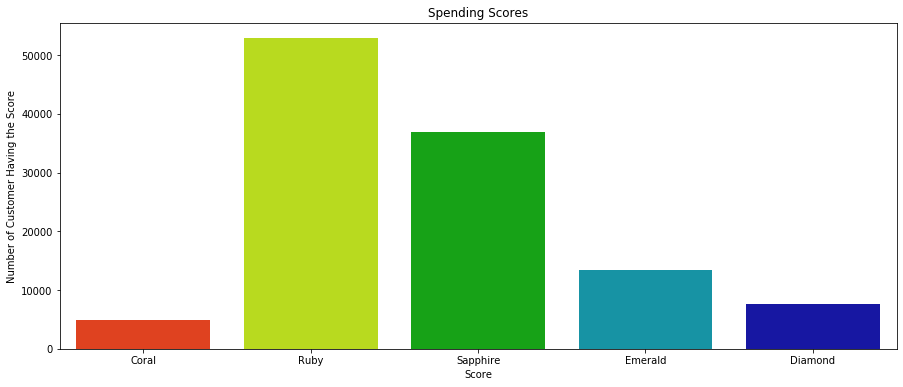

In [16]:
ss1 = user_count_total["spend_score"][(user_count_total["spend_score"] == 'Coral')]
ss2 = user_count_total["spend_score"][(user_count_total["spend_score"] == 'Ruby')]
ss3 = user_count_total["spend_score"][(user_count_total["spend_score"] == 'Sapphire')]
ss4 = user_count_total["spend_score"][(user_count_total["spend_score"] == 'Emerald')]
ss5 = user_count_total["spend_score"][(user_count_total["spend_score"] == 'Diamond')]
#ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
#ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
#ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
#ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["Coral", "Ruby", "Sapphire", "Emerald", "Diamond"]
ssy = [len(ss1.values), len(ss2.values), len(ss3.values), len(ss4.values), len(ss5.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

In [17]:
user_count_total

,user_id,Transaction_count,cost_y,avg_spend,spend_score
0,1,10,140,14.000000,Ruby
1,2,2,28,14.000000,Ruby
2,3,1,10,10.000000,Ruby
3,7,3,55,18.333333,Sapphire
4,8,1,18,18.000000,Sapphire
...,...,...,...,...,...
115762,206204,1,16,16.000000,Sapphire
115763,206206,1,13,13.000000,Ruby
115764,206207,1,11,11.000000,Ruby
115765,206208,15,312,20.800000,Sapphire


In [18]:
user_count_total['gender'] = user_count_total.user_id.apply(lambda x: random.choice(['F', 'M'])) 
user_count_total

,user_id,Transaction_count,cost_y,avg_spend,spend_score,gender
0,1,10,140,14.000000,Ruby,F
1,2,2,28,14.000000,Ruby,F
2,3,1,10,10.000000,Ruby,M
3,7,3,55,18.333333,Sapphire,F
4,8,1,18,18.000000,Sapphire,M
...,...,...,...,...,...,...
115762,206204,1,16,16.000000,Sapphire,M
115763,206206,1,13,13.000000,Ruby,M
115764,206207,1,11,11.000000,Ruby,F
115765,206208,15,312,20.800000,Sapphire,M


In [19]:
user_count_total['state'] = user_count_total.user_id.apply(lambda x: random.choice(['MA', 'CA','NY','NJ','OH','TX','VA','LA','TN','KY','MD','IL','AZ','FL'])) 
user_count_total

,user_id,Transaction_count,cost_y,avg_spend,spend_score,gender,state
0,1,10,140,14.000000,Ruby,F,NY
1,2,2,28,14.000000,Ruby,F,VA
2,3,1,10,10.000000,Ruby,M,OH
3,7,3,55,18.333333,Sapphire,F,LA
4,8,1,18,18.000000,Sapphire,M,IL
...,...,...,...,...,...,...,...
115762,206204,1,16,16.000000,Sapphire,M,NJ
115763,206206,1,13,13.000000,Ruby,M,CA
115764,206207,1,11,11.000000,Ruby,F,MA
115765,206208,15,312,20.800000,Sapphire,M,AZ


In [20]:
#Purchase Frequency is the ratio of the total number of orders and the total number of customer. 
#It represents the average number of orders placed by each customer.
purchase_frequency=sum(user_count_total['Transaction_count'])/user_count_total.shape[0]
purchase_frequency

4.357226152530514

In [21]:
repeat_rate=user_count_total[user_count_total.Transaction_count > 1].shape[0]/user_count_total.shape[0]
repeat_rate

0.6590479152089974

In [60]:
#Churn Rate
churn_rate=1-repeat_rate
churn_rate
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [61]:
# Profit Margin
user_count_total['profit_margin']=user_count_total['cost_y']*0.05
import pickle
pickle_out=open("D:/DigitalMarketting/pickleFinal.pickle","wb")
pickle.dump(user_count_total,pickle_out)
pickle_out.close()
user_count_total

,user_id,Transaction_count,cost_y,avg_spend,spend_score,gender,state,profit_margin,CLV,clv_score
0,1,10,140,14.000000,Ruby,F,NY,7.00,178.914190,2
1,2,2,28,14.000000,Ruby,F,VA,1.40,178.914190,2
2,3,1,10,10.000000,Ruby,M,OH,0.50,127.795850,2
3,7,3,55,18.333333,Sapphire,F,LA,2.75,234.292392,3
4,8,1,18,18.000000,Sapphire,M,IL,0.90,230.032530,3
...,...,...,...,...,...,...,...,...,...,...
115762,206204,1,16,16.000000,Sapphire,M,NJ,0.80,204.473360,3
115763,206206,1,13,13.000000,Ruby,M,CA,0.65,166.134605,2
115764,206207,1,11,11.000000,Ruby,F,MA,0.55,140.575435,2
115765,206208,15,312,20.800000,Sapphire,M,AZ,15.60,265.815368,3


In [24]:
# Customer Value
user_count_total['CLV']=(user_count_total['avg_spend']*purchase_frequency)/churn_rate
user_count_total

,user_id,Transaction_count,cost_y,avg_spend,spend_score,gender,state,profit_margin,CLV
0,1,10,140,14.000000,Ruby,F,NY,7.00,178.914190
1,2,2,28,14.000000,Ruby,F,VA,1.40,178.914190
2,3,1,10,10.000000,Ruby,M,OH,0.50,127.795850
3,7,3,55,18.333333,Sapphire,F,LA,2.75,234.292392
4,8,1,18,18.000000,Sapphire,M,IL,0.90,230.032530
...,...,...,...,...,...,...,...,...,...
115762,206204,1,16,16.000000,Sapphire,M,NJ,0.80,204.473360
115763,206206,1,13,13.000000,Ruby,M,CA,0.65,166.134605
115764,206207,1,11,11.000000,Ruby,F,MA,0.55,140.575435
115765,206208,15,312,20.800000,Sapphire,M,AZ,15.60,265.815368


In [25]:
clv_mean = user_count_total['CLV'].mean()
clv_median = user_count_total['CLV'].median()
clv_std = user_count_total['CLV'].std()
print(clv_mean)
print(clv_median)
print(clv_std)

217.04980459746704
188.49887892376682
108.87781494263024


In [26]:
#Customer Lifetime Value
#user_count_total['cust_lifetime_value']=user_count_total['CLV']*user_count_total['profit_margin']
#user_count_total

In [27]:
#Customer lifevalue Score
spend_mean = user_count_total['avg_spend'].mean()
spend_median = user_count_total['avg_spend'].median()
spend_std = user_count_total['avg_spend'].std()
print(spend_mean)
print(spend_median)
print(spend_std)


16.984104287999642
14.75
8.519667488598003


In [28]:
sort_by_avg = user_count_total.sort_values('CLV')
sort_by_avg

,user_id,Transaction_count,cost_y,avg_spend,spend_score,gender,state,profit_margin,CLV
44739,79622,1,1,1.000000,Coral,F,MA,0.05,12.779585
115035,204893,1,1,1.000000,Coral,M,CA,0.05,12.779585
20901,37540,1,1,1.000000,Coral,F,AZ,0.05,12.779585
30286,54102,11,11,1.000000,Coral,M,IL,0.55,12.779585
97291,173375,1,1,1.000000,Coral,F,IL,0.05,12.779585
...,...,...,...,...,...,...,...,...,...
99614,177595,2,182,91.000000,Diamond,F,NJ,9.10,1162.942236
21778,39064,2,188,94.000000,Diamond,F,IL,9.40,1201.280991
72793,129604,2,188,94.000000,Diamond,M,FL,9.40,1201.280991
41590,74058,4,424,106.000000,Diamond,F,NJ,21.20,1354.636011


In [29]:
user_count_total['clv_score'] = 0

In [30]:
for ind in user_count_total.index:
    if(user_count_total['CLV'][ind] < (clv_median - clv_std)):
        user_count_total['clv_score'][ind] = 1
    elif((clv_median - clv_std) <= user_count_total['CLV'][ind] < (clv_median)):
        user_count_total['clv_score'][ind] = 2
    elif((clv_median) <= user_count_total['CLV'][ind] < (clv_median + clv_std)):
        user_count_total['clv_score'][ind] = 3
    elif((clv_median + clv_std) <= user_count_total['CLV'][ind] < (clv_median + (2*clv_std))):
        user_count_total['clv_score'][ind] = 4
    elif((clv_median + (2*clv_std)) < user_count_total['CLV'][ind]):
        user_count_total['clv_score'][ind] = 5

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp

In [31]:
user_count_total

,user_id,Transaction_count,cost_y,avg_spend,spend_score,gender,state,profit_margin,CLV,clv_score
0,1,10,140,14.000000,Ruby,F,NY,7.00,178.914190,2
1,2,2,28,14.000000,Ruby,F,VA,1.40,178.914190,2
2,3,1,10,10.000000,Ruby,M,OH,0.50,127.795850,2
3,7,3,55,18.333333,Sapphire,F,LA,2.75,234.292392,3
4,8,1,18,18.000000,Sapphire,M,IL,0.90,230.032530,3
...,...,...,...,...,...,...,...,...,...,...
115762,206204,1,16,16.000000,Sapphire,M,NJ,0.80,204.473360,3
115763,206206,1,13,13.000000,Ruby,M,CA,0.65,166.134605,2
115764,206207,1,11,11.000000,Ruby,F,MA,0.55,140.575435,2
115765,206208,15,312,20.800000,Sapphire,M,AZ,15.60,265.815368,3


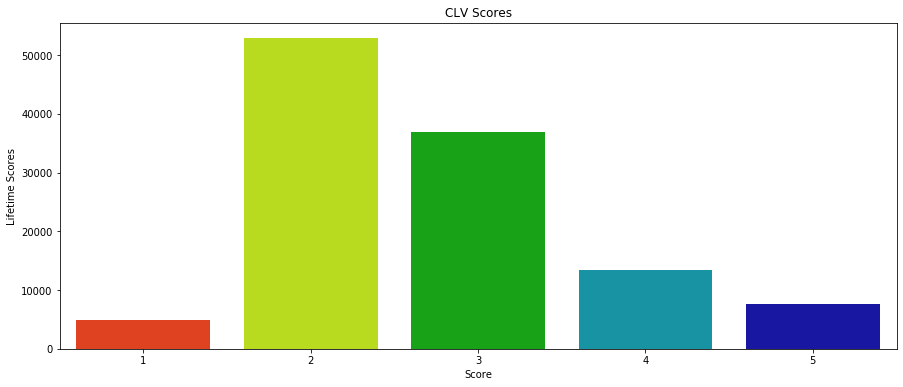

In [32]:
ss1 = user_count_total["clv_score"][(user_count_total["clv_score"] == 1)]
ss2 = user_count_total["clv_score"][(user_count_total["clv_score"] == 2)]
ss3 = user_count_total["clv_score"][(user_count_total["clv_score"] == 3)]
ss4 = user_count_total["clv_score"][(user_count_total["clv_score"] == 4)]
ss5 = user_count_total["clv_score"][(user_count_total["clv_score"] == 5)]
#ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
#ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
#ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
#ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["1", "2", "3", "4", "5"]
ssy = [len(ss1.values), len(ss2.values), len(ss3.values), len(ss4.values), len(ss5.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("CLV Scores")
plt.xlabel("Score")
plt.ylabel("Lifetime Scores")
plt.show()

In [33]:
clv_df = user_count_total.groupby(['clv_score'], as_index = False)[['avg_spend']].sum()
clv_df

,clv_score,avg_spend
0,1,24623.226989
1,2,603577.114986
2,3,677905.737535
3,4,364033.382491
4,5,296059.339108


In [34]:
clv_df['acq_budget']=0

In [35]:
for i in clv_df.index:
    
    if (clv_df['clv_score'][i]==1):
        print(i)
        clv_df['acq_budget'][i] = ((clv_df['avg_spend'][i]) * 0.35)
    
    elif (clv_df['clv_score'][i]==2):
        print((clv_df['avg_spend'][i]))
        clv_df['acq_budget'] [i]= ((clv_df['avg_spend'][i]) * 0.25)
        
    elif (clv_df['clv_score'][i]==3):
        print((clv_df['avg_spend'][i]))
        clv_df['acq_budget'] [i]= ((clv_df['avg_spend'][i]) * 0.20)
    
    elif (clv_df['clv_score'][i]==4):
        clv_df['acq_budget'] [i] = ((clv_df['avg_spend'][i]) * 0.15)
        
    elif (clv_df['clv_score'][i]==5):
        clv_df['acq_budget'] [i] = ((clv_df['avg_spend'][i]) * 0.10)
        

0
603577.1149864839
677905.7375349528


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher

In [36]:
clv_df

,clv_score,avg_spend,acq_budget
0,1,24623.226989,8618
1,2,603577.114986,150894
2,3,677905.737535,135581
3,4,364033.382491,54605
4,5,296059.339108,29605


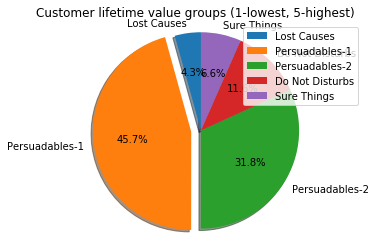

In [57]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
ss1 = user_count_total["clv_score"][(user_count_total["clv_score"] == 1)]
ss2 = user_count_total["clv_score"][(user_count_total["clv_score"] == 2)]
ss3 = user_count_total["clv_score"][(user_count_total["clv_score"] == 3)]
ss4 = user_count_total["clv_score"][(user_count_total["clv_score"] == 4)]
ss5 = user_count_total["clv_score"][(user_count_total["clv_score"] == 5)]
labels = 'Lost Causes', 'Persuadables-1', 'Persuadables-2', 'Do Not Disturbs','Sure Things'
sizes = ssy = [len(ss1.values), len(ss2.values), len(ss3.values), len(ss4.values), len(ss5.values)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','orange']
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title ( "Customer lifetime value groups (1-lowest, 5-highest)")
plt.show()
    